In [45]:
import os 
from dotenv import load_dotenv

load_dotenv()

os.environ['GroqApi']=os.getenv('GROQ_API_KEY')
os.environ['TavilyApi']=os.getenv('TAVILY_API_KEY')



In [46]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant" )

res = llm.invoke("hello what is your name?")
print(res.content)

I don't have a personal name, but I'm an AI designed to assist and communicate with users in a helpful and informative way. You can think of me as a conversational AI assistant. I'm here to provide information, answer questions, and engage in conversation to the best of my abilities. How can I assist you today?


In [48]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun, DuckDuckGoSearchRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper, DuckDuckGoSearchAPIWrapper

# Initialize wrappers
arxiv_wrapper = ArxivAPIWrapper(top_k_results=3, doc_content_chars_max=1000)
wikipedia_wrapper = WikipediaAPIWrapper(top_k_results=3, doc_content_chars_max=1000)
duckduckgo_wrapper = DuckDuckGoSearchAPIWrapper(max_results=3)

# Initialize tools
arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wrapper)
wikipedia_tool = WikipediaQueryRun(api_wrapper=wikipedia_wrapper)
duckduckgo_tool = DuckDuckGoSearchRun(api_wrapper=duckduckgo_wrapper)

# Testing the tools
arxiv_results = arxiv_tool.invoke("attention is all you need")
wikipedia_results = wikipedia_tool.invoke("GenAi in finance")
duckduckgo_results = duckduckgo_tool.invoke("when did chatgpt 5 or gpt5 released?")




c:\Users\chris\OneDrive\Desktop\Gen-ai\LangGRAPH_basics\.venv\Lib\site-packages\langchain_community\utilities\arxiv.py:105: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  ).results()
c:\Users\chris\OneDrive\Desktop\Gen-ai\LangGRAPH_basics\.venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


In [49]:
print("Arxiv:", arxiv_results)


Arxiv: Published: 2024-07-22
Title: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models
Authors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini
Summary: The inference demand for LLMs has skyrocketed in recent months, and serving
models with low latencies remains challenging due to the quadratic input length
complexity of the attention layers. In this work, we investigate the effect of
dropping MLP and attention layers at inference time on the performance of
Llama-v2 models. We find that dropping dreeper attention layers only marginally
decreases performance but leads to the best speedups alongside dropping entire
layers. For example, removing 33\% of attention layers in a 13B Llama2 model
results in a 1.8\% drop in average performance over the OpenLLM benchmark. We
also observe that skipping layers except the latter layers reduces performances
for more layers skipped, except for skipping the attention layers.

Published:

In [50]:
print("Wikipedia:", wikipedia_results)


Wikipedia: Page: Generative artificial intelligence
Summary: Generative artificial intelligence (Generative AI, GenAI, or GAI) is a subfield of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models learn the underlying patterns and structures of their training data and use them to produce new data based on the input, which often comes in the form of natural language prompts.
Generative AI tools have become more common since the AI boom in the 2020s. This boom was made possible by improvements in transformer-based deep neural networks, particularly large language models (LLMs). Major tools include chatbots such as ChatGPT, Copilot, Gemini, Claude, Grok, and DeepSeek; text-to-image models such as Stable Diffusion, Midjourney, and DALL-E; and text-to-video models such as Veo and Sora. Technology companies developing generative AI include OpenAI, xAI, Anthropic, Meta AI, Microsoft, Google, DeepSeek, and Baidu. 
Generative 

In [51]:
print("DuckDuckGo:", duckduckgo_results)

DuckDuckGo: Aug 13, 2025 · OpenAI released its newest GPT model, GPT-5, which runs ChatGPT, in August 2025. Learn about its key features and how it … Aug 7, 2025 · The release of GPT-5 has been fueled by an unprecedented funding surge, as OpenAI closed a $40 billion funding round in … OpenAI had been building hype for GPT-5, and today, 7 August, it has finally released the all-new model for everyone. The company is …


In [52]:
tools=[arxiv_tool, wikipedia_tool]

In [53]:
llm_with_tools=llm.bind_tools(tools)

In [54]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"1706.03762")])

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '1cyj62cy0', 'function': {'arguments': '{"query":"1706.03762"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 435, 'total_tokens': 454, 'completion_time': 0.025218573, 'prompt_time': 0.039104842, 'queue_time': 0.893725989, 'total_time': 0.064323415}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--58b001a4-4a8a-4df6-9c1a-0caa40c1a1b8-0', tool_calls=[{'name': 'arxiv', 'args': {'query': '1706.03762'}, 'id': '1cyj62cy0', 'type': 'tool_call'}], usage_metadata={'input_tokens': 435, 'output_tokens': 19, 'total_tokens': 454})

In [44]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"genAI")]).tool_calls


[{'name': 'wikipedia',
  'args': {'query': 'GenAI'},
  'id': '6da2ksw41',
  'type': 'tool_call'}]

In [34]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]
    mode: str

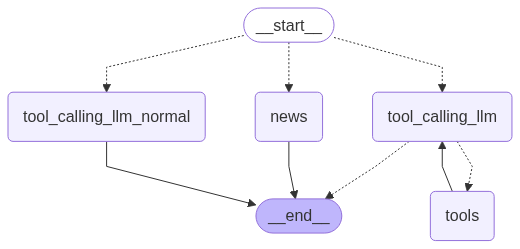

In [72]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition

# --- Node definitions ---
def tool_calling_llm(state: State):
    print(state['mode'])
    print(state['messages'][0].content)
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

def news_llm(state: State):
    ip = state["messages"][0].content
    print(state['mode'])
    print(state['messages'][0].content)
    return {"messages": [duckduckgo_tool.invoke(ip)]}



# --- Normal bot node ---
def normal_llm(state: State):
    print(state['mode'])
    print(state['messages'])
    return {"messages": [llm.invoke(state["messages"])]}


# --- Router function ---
def usecase_condition(state:State):
    mode = state.get("mode", "normal")

    if mode == "tools":
        return "tool_calling_llm"
    elif mode == "news":
        return "news"
    else:  # normal bot
        return "tool_calling_llm_normal"
    
    
# --- Build graph ---
builder = StateGraph(State)

builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))
builder.add_node("news", news_llm)
builder.add_node("tool_calling_llm_normal", normal_llm)

# Router: START → based on user mode
builder.add_conditional_edges(
    START,
    usecase_condition,
    {
        "tool_calling_llm": "tool_calling_llm",
        "news": "news",
        "tool_calling_llm_normal": "tool_calling_llm_normal",
    }
)

# Tools loop
builder.add_conditional_edges("tool_calling_llm", tools_condition)
builder.add_edge("tools", "tool_calling_llm")

# Finish paths
builder.add_edge("news", END)
builder.add_edge("tool_calling_llm_normal", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [73]:
messages=graph.invoke({"messages":HumanMessage(content="1706.03762"),"mode":"tools"})
for m in messages['messages']:
    m.pretty_print()

tools
1706.03762


c:\Users\chris\OneDrive\Desktop\Gen-ai\LangGRAPH_basics\.venv\Lib\site-packages\langchain_community\utilities\arxiv.py:102: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  ).results()


tools
1706.03762
tools
1706.03762
================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (x8vfsrye8)
 Call ID: x8vfsrye8
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, based
solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Experiments on two machine t

In [61]:
messages=graph.invoke({"messages":"write a poem on a person named mithila girl who is loved by kolol boy","mode":"normal"})
for m in messages['messages']:
    m.pretty_print()

normal
================================ Human Message =================================

write a poem on a person named mithila girl who is loved by kolol boy
================================== Ai Message ==================================

In the lands of Bengal's golden shore,
Lived a beauty, Mithila, forever more,
A girl of elegance, with a heart so bright,
Her smile could light up the darkest of nights.

Her eyes, like the Ganges, flowed with gentle might,
Reflecting the love that shone with delight,
Her hair, like the blackest night, shone with a radiant glow,
A true gem, that the Kolol boy had to know.

He, a hunter, with a heart so bold,
Fell for her charms, his love to unfold,
He'd roam the forests, with a passion so true,
To win her heart, and be with her anew.

The Kolol boy, with a love so pure and kind,
Would sing to her, with a voice that would bind,
Their love would grow, like the trees in the night,
A flame that burned, with a love so bright.

Mithila, the girl, with a h

In [82]:
messages=graph.invoke({"messages":"when did llama 2 get released?","mode":"news"})
for m in messages['messages']:
    m.pretty_print()

news
when did llama 2 get released?


c:\Users\chris\OneDrive\Desktop\Gen-ai\LangGRAPH_basics\.venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


================================ Human Message =================================

when did llama 2 get released?
================================ Human Message =================================

Aug 4, 2025 · Accessibility and Distribution: Meta has released Llama 2 under a permissive license for free personal and commercial use. Businesses with less than 700 million monthly … Feb 11, 2025 · In August 2023, Code Llama was introduced. These models were specialized for coding, with one version focusing on Python. For developers, this was a big deal — open-source … May 29, 2025 · Llama 2.0’s 2023 release (in partnership with Microsoft) broke open the closed-source mold, making advanced LLMs available for both research and commercial use (Meta …
